In [185]:
def latchSR(S,R):
    Q = False
    notQ = True
    Qi = None
    notQi = None
    while Q != Qi:
        Q = not(R or notQi)
        notQ = not(S or Qi)
        Qi = Q
        notQi = notQ
    
    return Q, notQ

In [186]:
latchSR(False,False)

(True, True)

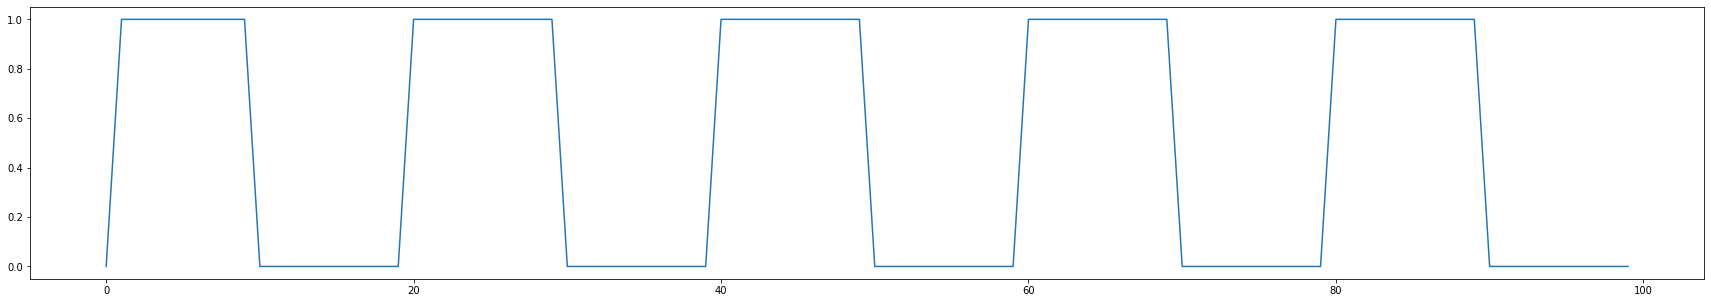

In [191]:
import numpy as np
import matplotlib.pyplot as plt

k = 10
t = np.linspace(0,k*2*np.pi,100)
period = 0.5
f = np.sin(period*t) > 0

plt.figure(figsize=(30,5))
plt.plot(f)
plt.show()

In [220]:
def clock_pulse(t,period=0.5):
    return np.sin(period*t) > 0

class LatchD():
    def __init__(self, Q=True):
        self.Q = Q
        self.notQ = not(Q)
    def latch(self, D, t=0):
        notD = not(D)
        pulse = clock_pulse(t)
        R = not(D and pulse)
        S = not(notD and pulse)
        self.Q = not(R or self.notQ)
        self.notQ = not(S or self.Q)

In [223]:
latchD = LatchD()
latchD.latch(True, t=0)
latchD.Q

False

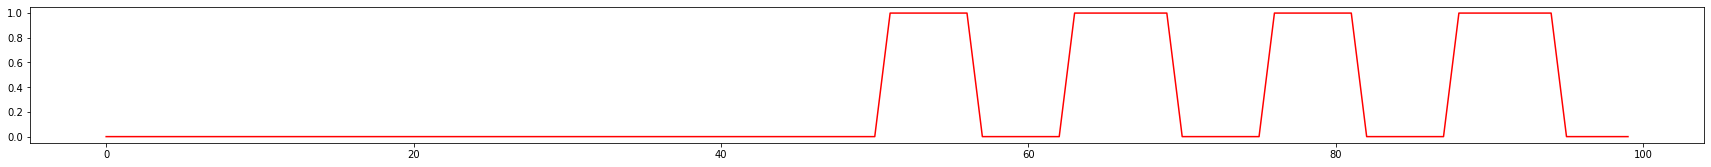

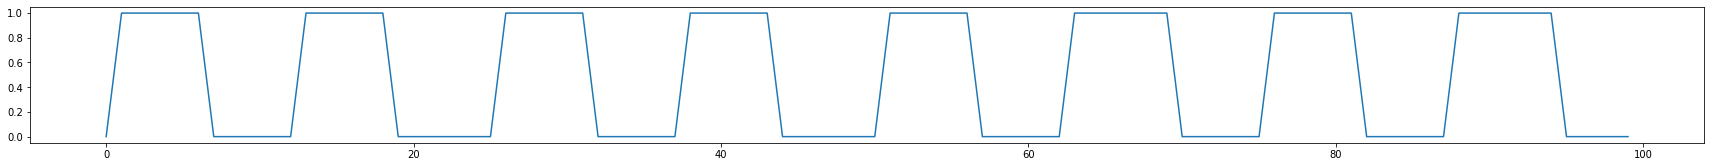

In [224]:
Qs = []
for t in range(0, 100):
    if t < 50:
        latchD.latch(False,t=t)
        Qs.append(latchD.Q)
    else:
        latchD.latch(True,t=t)
        Qs.append(latchD.Q)

plt.figure(figsize=(30,2.5))
plt.plot(Qs, c='r')
plt.show()
plt.figure(figsize=(30,2.5))
plt.plot([clock_pulse(t) for t in range(0,100)])
plt.show()